<a id='intro'></a>
## Introduction
### No-show appointments Dataset
#### which attributes are good indicators of showing up?

##### in this EDA all variables of the data set shall be explored to see which of them are a good factor in predicting whether a patient is going to show up or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling





### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#drop uneeded columns
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

checking number of samples + columns, fond 110 thousand samples and 14 columns

In [5]:
df.shape

(110527, 12)

first  check for nulls, thankfully there is none

In [6]:
df.isna().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

the no_show column values are strings with Yes and No so it better to change them to 1 and 0, **where 0 means patient came and 1 means they didn't**

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [8]:
df['No-show'].replace('No','0',inplace=True)
df['No-show'].replace('Yes','1',inplace=True)
df['No-show']=df['No-show'].astype('int64')
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [9]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


from the "No_show" mean, on averge 20% of the patients dont show up. so the avrage show up rate is 80%

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 10.1+ MB


since there is capital letters in columns names it better to make them lower cap, then check each column type (while also confiming that columns are lower case now)

In [11]:
df.columns = df.columns.str.lower()
df.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no-show            int64
dtype: object

checking for date time columns data type and find out its actually strings not datetime data type

In [12]:
print(
    type(df['scheduledday'][0]),
    type(df['appointmentday'][0])
)

<class 'str'> <class 'str'>


checking for any odd values below

In [13]:
# print unique values for each column
for i in df:
    print('{}: \t\t'.format(i),df[i].unique())

gender: 		 ['F' 'M']
scheduledday: 		 ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
appointmentday: 		 ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
age: 		 [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27 

checking the nubmer of ages, there is ages equal to -1 and 0.
there is only one -1 age that can be droped.
ages that are equal to zero are probably babies so they shall not exclude them from the data.

In [14]:
print(len(df.query('age == -1')))
len(df.query('age == 0'))

1


3539

### Data Cleaning

In [15]:
# problems found:
# 1) columns had upper case. (already solved in wrangling section)
# 2) datetime format columns are strings not datetime
# 3) a -1 in the age column
# 4) the column "no-show" has "-" instead of "_"

#ps: 1 is solved in wrangling for convince in the wrangling section

#### solving problem 2: datetimes

In [16]:
# turning datetime fromat columns from strings to date time
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])
# cheacking
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0


#### solving problem 3: row with -1 age

In [17]:
# drop -1 age values then check the number of ages equal to -1 (should be 0)
df.drop(df.loc[df['age']==-1].index, inplace=True)
len(df.query('age == -1'))

0

#### solving problem 4: replacing column name's "-" with "_"

In [18]:
df.rename(columns={'no-show':'no_show'},inplace=True)
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                         int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Finding Best Factor for Showing Up

In [19]:
#flips a probability of p to 1-p
def flip_prob(x):
    return 1-x

In [20]:
# makes
def qucik_bar(labels, data, title='', labelx='', labely='',grid_it=True):
    # makes a quick bar using:
    # label : string for labels or int/float for bar locations on x axis
    # data : list with data for each bar
    # (optional) graph title: string
    # (optional) label x: string
    # (optional) label y: string
    plt.bar(labels,data)
    plt.title(title)
    plt.ylabel(labely)
    plt.xlabel(labelx)
    if grid_it: plt.grid()

#### by age

In [21]:
# warning in no_show the value "No" means patient showed and "Yes" mean they didn't
ages=list(df['age'].unique())
ages.sort()
probability=[]

#calculate propapilty for each age and store it in propapilityes list
for age in ages:
    temp= df.query('age == {}'.format(age))['no_show'].value_counts()
    probability.append( df.query('age == {} and no_show == 0 '.format(age)).count()[0] /df.query('age == {}'.format(age)).count()[0] )

# last proapilty value is 1.5 so it is set to 1 because there is no probabilty higher than 1

the last 4 probabilities are 1 or 0.4 which are ages 99 and above. also there are only 12 cases so they are considered outlires and will be excluded from the next graph

In [22]:
probability[-4:]

[1.0, 1.0, 1.0, 0.4]

In [23]:
ages[-4:]

[99, 100, 102, 115]

In [24]:
df.query('age >= 99')['age'].count()

12

In [25]:
#removing outlierts, ages 99 and above
probability=probability[:-4]
ages=ages[:-4]

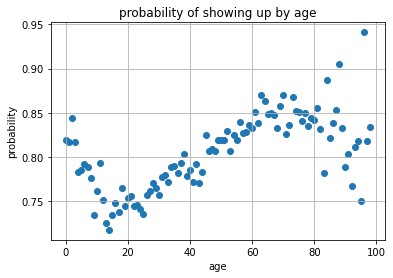

In [26]:
plt.scatter(x=ages,y=probability)
plt.title('probability of showing up by age')
plt.xlabel('age')
plt.ylabel('probability')
plt.grid()

there is a decline of probability of showing up as patient a proach the age of 20. after 20, the probability of coming increases

#### by sms

In [27]:
sms = df.query('sms_received == 1')['no_show']
no_sms= df.query('sms_received == 0')['no_show']
sms_probability = sms.value_counts()[0]/sms.value_counts().sum()
no_sms_probability = no_sms.value_counts()[0]/no_sms.value_counts().sum()

In [28]:
#probabilitiy of patient coming if sms is sent
sms_probability

0.7242545516036301

In [29]:
#probabilitiy of patient coming if sms is not sent
no_sms_probability

0.8329646607323703

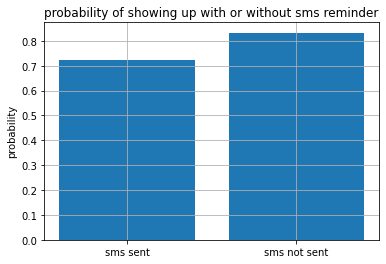

In [30]:
qucik_bar(['sms sent','sms not sent'],
          [sms_probability,no_sms_probability],
          title='probability of showing up with or without sms reminder',
          labely='probability')

The sms atribute is not a good indicator of showing up or not showing up; since not Sending an sms seems to increase the probability of showing up but in reality that probably means people generaly dont check the sms messages or ignore them

#### by gender

In [31]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

female patients make 65% of the database

In [32]:
df['gender'].value_counts()['F']/df['gender'].value_counts().sum()

0.6499737618297957

In [33]:
male = df.query('gender == "M" ')['no_show']
female = df.query('gender == "F" ')['no_show']
male_probability = male.value_counts()[0]/male.value_counts().sum()
female_probability = female.value_counts()[0]/female.value_counts().sum()

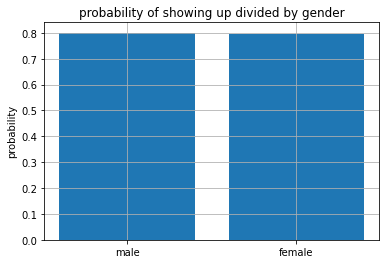

In [34]:
qucik_bar(['male','female'],
          [male_probability,female_probability],
          title='probability of showing up divided by gender',
          labely='probability')

Gender is not a good indicator because both probabilites are almost equal to the average show up rate 80%

#### by handicap

In [35]:
df['handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [36]:
handcaps = list(df['handcap'].value_counts().index)
cap_showed_up_probabilities=[]

for i in handcaps:
    temp=df.query('handcap == {} '.format(i))['no_show']
    cap_showed_up_probabilities.append(temp.value_counts()[0]/temp.value_counts().sum())

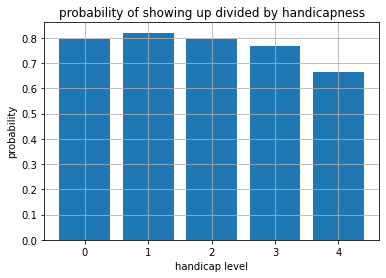

In [37]:
qucik_bar(list(map(str,handcaps)),
          cap_showed_up_probabilities,
          title='probability of showing up divided by handicapness',
          labelx='handicap level',
          labely='probability')

handcap isnt a good indicator; since almost show up rate is almot equal to the global average rate of 80%. however, there is a fall to .66% at handcap 4 probably due to having only 3 rows and not enough data

#### by day of the week

In [38]:
#new columns represnting days of the week for the 2 date related columns
df['scheduledday_of_the_week'] = df['scheduledday'].dt.dayofweek
df['appointmentday_of_the_week'] = df['appointmentday'].dt.dayofweek

In [39]:
#days of the week inculed in the data
week   = ['Monday', 
          'Tuesday', 
          'Wednesday', 
          'Thursday',  
          'Friday', 
          'Saturday']

In [40]:
#calculating show up probability for each day for both columns
df.groupby('scheduledday_of_the_week')['no_show'].mean()
scheduledday_days=list(df.groupby('scheduledday_of_the_week')['no_show'].mean())

df.groupby('appointmentday_of_the_week')['no_show'].mean()
appointments_days=list(df.groupby('appointmentday_of_the_week')['no_show'].mean())

# switching probabilty from probabilty of not showing up to probability of showing up by doing 1-probability
for i in range(len(scheduledday_days)):scheduledday_days[i]=flip_prob(scheduledday_days[i])
for i in range(len(appointments_days)):appointments_days[i]=flip_prob(appointments_days[i])
    

In [41]:
scheduledday_days

[0.8024172587073297,
 0.7978064811984102,
 0.7989036353144836,
 0.7952747191943783,
 0.7945017182130585,
 0.9583333333333334]

''

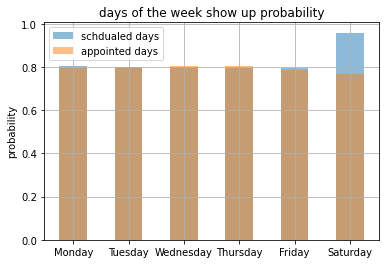

In [42]:
indent=range(len(week))
wide=0.5
plt.bar(week,scheduledday_days,alpha=0.5,width=0.5)
plt.bar(week,appointments_days,alpha=0.5,width=0.5)
plt.title('days of the week show up probability')
plt.ylabel('probability')
plt.grid()
plt.legend(['schdualed days','appointed days'])
;

all days have the global average rate of 80% while Sat. has an abnormally high 95% on Sch. and a bit low on appointed days. so looking at the days samples count (the 2 cells below) its found that Saturday -indexed number 5- only has 24 samples in the former case and 39 in the later, weakening the credibility of saturday score. also indicates that saturday barely has any patients compared to other days.

In [43]:
df.groupby('scheduledday_of_the_week')['no_show'].value_counts()

scheduledday_of_the_week  no_show
0                         0          18523
                          1           4561
1                         0          20877
                          1           5291
2                         0          19383
                          1           4879
3                         0          14373
                          1           3700
4                         0          15028
                          1           3887
5                         0             23
                          1              1
Name: no_show, dtype: int64

In [44]:
df.groupby('appointmentday_of_the_week')['no_show'].value_counts()

appointmentday_of_the_week  no_show
0                           0          18024
                            1           4690
1                           0          20488
                            1           5152
2                           0          20774
                            1           5093
3                           0          13909
                            1           3338
4                           0          14982
                            1           4037
5                           0             30
                            1              9
Name: no_show, dtype: int64

In [45]:
#calculate probabilty of not coming for each stat an store it in stat_propapilities
stat=['scholarship', 'hipertension', 'diabetes', 'alcoholism']
stat_propapilities=[]

for i in stat:
    stat_propapilities.append(df.groupby(i)['no_show'].mean())
stat_propapilities

[scholarship
 0    0.198074
 1    0.237363
 Name: no_show, dtype: float64,
 hipertension
 0    0.209039
 1    0.173020
 Name: no_show, dtype: float64,
 diabetes
 0    0.203630
 1    0.180033
 Name: no_show, dtype: float64,
 alcoholism
 0    0.201948
 1    0.201488
 Name: no_show, dtype: float64]

In [46]:
#organize data befor making it a dataframe
with_stat = []
without_stat = []

temp=[]
for i in range(len(stat)):
    with_stat.append(stat_propapilities[i][0])
    without_stat.append(stat_propapilities[i][1])



In [47]:
stat_df = pd.DataFrame(
    {
        'condition': stat,
        'with_condition': with_stat,
        'without_condition': without_stat
    })
stat_df['with_condition']=flip_prob(stat_df['with_condition'])
stat_df['without_condition']=flip_prob(stat_df['without_condition'])
stat_df

,condition,with_condition,without_condition
0,scholarship,0.801926,0.762637
1,hipertension,0.790961,0.826980
2,diabetes,0.796370,0.819967
3,alcoholism,0.798052,0.798512


this data frame maps the existence or lack of a condition with the probability of patient showing up

''

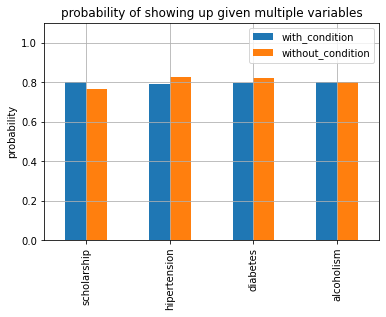

In [48]:
ax=stat_df.plot.bar()
ax.set_ylim(0,1.1)
ax.grid()
ax.set_xticklabels(stat)
ax.set_title('probability of showing up given multiple variables')
ax.set_ylabel('probability')
;

looking at the data seems like all these variables are not good at predicting whether a patient is going to show up

<a id='conclusions'></a>
## Conclusions


### Main qustion:
which attributes are good indicators of showing up?

All variables have been tested & only age has been found to have a good coorerlation with showing up.

ages 0 to 20 have a gradual decline on showing up from 84% at 0 to about 70% at 20. while after 20 showing up chance increases gradually from 70% at 20 to about 85% at 60. it is stable with some fluctioation from ages 60 to 80 but after 80 fluctuates alot due to low data. 

general insights:
1) on average each patient has an 80% chance of showing up. (cell out[9])

2) 65% of the dataset is female. (cell out[32])

3) there is significantly less patients on Saturdays. (cells out[44] & out[45], index 5)

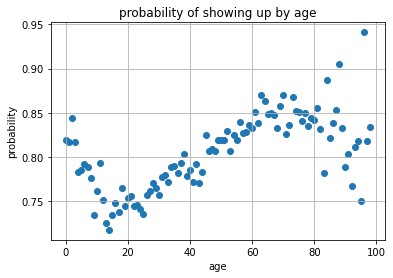

In [49]:
plt.scatter(x=ages,y=probability)
plt.title('probability of showing up by age')
plt.xlabel('age')
plt.ylabel('probability')
plt.grid()

## limitations

1) data of ages 99 and above are scarce and reasonably so, due to the scarcity of humans in such age range. however, that makes any assumptions based on this group weak. further data colection might be required.

2) the hour is recorded at scheduleddate column which may have a correlation with probability of showing up.

3) unlike scheduledday, appointmentday does not have hour info, which might be a loss of usefull information.